Having too many features pose a problem well known as the curse of dimensionality. </br></br>
The simplest form of selecting features would be to <b>remove features with very low variance.</b></br></br>
If the features have a very low variance (i.e. very close to 0), they are close to being constant and thus, do not add any value to any model at all. It would just be nice to get rid of them and hence lower the complexity. Please note that the variance also depends on scaling of the data.


In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
X_train = pd.read_csv("../input/santaner/train.csv", nrows=35000)
X_test = pd.read_csv("../input/santaner/test.csv", nrows=15000)

# drop TARGET label from X_train
X_train.drop(labels=['TARGET'], axis=1, inplace = True)

# check shape of training and test sets
X_train.shape, X_test.shape


var_thresh = VarianceThreshold(threshold=0)  # 0.1 indicates 99% of observations approximately
var_thresh.fit(X_train)
# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(var_thresh.get_support())
"""
alternative way of doing the above operation:
len(X_train.columns[sel.get_support()])
"""
# finally we can print the quasi-constant features
print(
    len([x for x in X_train.columns if x not in X_train.columns[var_thresh.get_support()]])
)

[x for x in X_train.columns if x not in X_train.columns[var_thresh.get_support()]]


51


['ind_var2_0',
 'ind_var2',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var2

- We can see that there are 51 columns / variables that are constant. This means that 51 variables show the same value, just one value, for all the observations of the training set.
</br></br>
- We then use the transform function to reduce the training and testing sets.

In [2]:
# we can then drop these columns from the train and test sets
X_train = var_thresh.transform(X_train)
X_test = var_thresh.transform(X_test)

In [3]:
# check the shape of training and test set
X_train.shape, X_test.shape

((35000, 319), (15000, 319))

- We can see how by removing constant features, we managed to reduced the feature space quite a bit.


In [4]:
"""
We can also remove
features which have a high correlation.
For calculating the correlation 
between different numerical features,
you can use the Pearson correlation.
"""
import pandas as pd 
import numpy as np
from sklearn.datasets import fetch_california_housing

# fetch a regression dataset
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# convert to pandas dataframe
df = pd.DataFrame(X, columns=col_names)
# introduce a highly correlated column
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)

# get correlation matrix (pearson)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


We see that the feature MedInc_Sqrt has a very high correlation with MedInc. We can thus remove one of them.


And now we can move to some univariate ways of feature selection. Univariate feature selection is nothing but a scoring of each feature against a given target. Mutual information, ANOVA F-test and chi2 are some of the most popular methods for univariate feature selection. There are two ways of using these in scikit- learn.
- SelectKBest: It keeps the top-k scoring features
- SelectPercentile: It keeps the top features which are in a percentage
specified by the user
</br></br>

It must be noted that you can use chi2 only for data which is non-negative in nature.


In [5]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile


class UnivariateFeatureSelection:
    def __init__(self, n_features, problem_type, scoring):
        """
        Custom univariate feature selection wrapper on
        different univariate feature selection models from scikit-learn.
        :param n_features: SelectPercentile if float else SelectKBest 
        :param problem_type: classification or regression
        :param scoring: scoring function, string
        """
        # for a given probelm type, there are only
        # a few valid scoring methods
        # methods if you wish
        if problem_type == "classification":
            valid_scoring = {
                "f_classif" : f_classif,
                "chi2" : chi2,
                "mutual_info_classif" : mutual_info_classif
            }
        else:
            valid_scoring = {
                "f_regression" : f_regression,
                "mutual_info_regression" : mutual_info_regression
            }
            
        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")
            
        # if n_features is int, we use selectKbest
        # if n_features is float, we use selectpercentile
        # please note that is is int in both cases in sklearn
        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features * 100)
            )
        else:
            raise Exception("Invalid type of feature")
            
    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    # same transform function
    def transform(self, X):
        return self.selection.transform(X)
    
    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)
    
ufs = UnivariateFeatureSelection(
    n_features=0.1,
    problem_type="regression",
    scoring="f_regression"
)
ufs.fit(X,y)
X_transformed = ufs.transform(X)
print(X_transformed)

[[8.3252]
 [8.3014]
 [7.2574]
 ...
 [1.7   ]
 [1.8672]
 [2.3886]]


Note: That should take care of most of your univariate feature selection needs. Please note that it’s usually better to create less and important features than to create hundreds of features in the first place. Univariate feature selection may not always perform well. Most of the time, people prefer doing feature selection using a machine learning model. Let’s see how that is done.

#  ***The simplest form of feature selection that uses a model for selection is known as greedy feature selection.***

In greedy feature selection, </br>
the first step is to choose a model.</br> The second step is to select a loss/scoring function. </br>And the third and final step is to iteratively evaluate each feature and add it to the list of “good” features if it improves loss/score.

But you must keep in mind that this is known as greedy feature selection for a reason. This feature selection process will fit a given model each time it evaluates a feature. The computational cost associated with this kind of method is very high. It will also take a lot of time for this kind of feature selection to finish. And if you do not use this feature selection properly, then you might even end up overfitting the model.

In [6]:
# Let's see how it workds by looking at how its implemented.
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import make_classification

class GreddyFeatureSelection:
    """
    A simple and custom class 
    for greedy feature selection.
    You will need to modify it quite 
    a bit to make it suitable for your dataset.
    """
    def evaluate_score(self, X, y):
        """
        This function evaluates model on data and returns Area Under ROC Curve (AUC)
        NOTE: We fit the data and calculate AUC on same data. 
        WE ARE OVERFITTING HERE.
        But this is also a way to achieve greedy selection.
        k-fold will take k times longer.
        If you want to implement it in really correct way, 
        calculate OOF AUC and return mean AUC over k folds.
        This requires only a few lines of change and has been
        shown a few times in this book.
        
        :param X: training data
        :param y: targets
        :return: overfitted area under the roc curve
        """
        # fit the logistic regression model,
        # and calculate AUC on same data
        # again: BEWARE
        # you can choose any model that suits your data.
        
        model = linear_model.LogisticRegression()
        model.fit(X, y)
        predictions = model.predict_proba(X)[:, 1]
        auc = metrics.roc_auc_score(y, predictions)
        return auc
    
    def feature_selection(self, X, y):
        """
        This function does the actual greedy selection 
        :param X: data, numpy array
        :param y: targets, numpy array
        :return: (best scores, best features)
        """
        # initialize good features list
        # and best scores to keep track of both
        good_features = []
        best_scores = []
        
        # calculate the number of features
        num_features = X.shape[1]
        
        # infinite loop
        while True:
            # initialize best feature and score of this loop
            this_feature = None
            best_score = 0
            
            # loop over all faetures
            for feature in range(num_features):
                # if feature is already in good features,
                # skip this for loop
                if feature in good_features:
                    continue
                # selected features are all good features till now
                # and current feature
                selected_features = good_features + [feature]
                # remove all other features from data
                xtrain = X[:, selected_features]
                # calculate the score, in our case, AUC
                score = self.evaluate_score(xtrain, y)
                # if score is greater than the best score
                # of this loop, change best score and best feature
                if score > best_score:
                    this_feature = feature
                    best_score = score
                    
                # if we have selected a feature, add it
                # to the good feature list and update best scores list
                if this_feature != None:
                    good_features.append(this_feature)
                    best_scores.append(best_score)
                    
                # if we didn't improve during the previous round,
                # exit the while loop
                if len(best_scores) > 2:
                    if best_scores[-1] < best_scores[-1]:
                        break
            # return best scores and good features
            # why do we remove the last data point?
            return best_scores[:-1], good_features[:-1]
        
    def __call__(self, X, y):
        """
        call function will call the class on a set of arguments
        """
        # select features, return scores and selected indices
        scores, features = self.feature_selection(X, y)
        # transform data with selected features
        return X[:, features], scores
        

        
if __name__ == "__main__":
    # generate binary classification data
    X, y = make_classification(
        n_samples=1000,
        n_features=100
    )
    
    X_transformed, scores = GreddyFeatureSelection()(X, y)

    print(X_transformed.shape)
    print(list(scores))
        

(1000, 99)
[0.5142602281636506, 0.527800444807117, 0.527800444807117, 0.5354685674970799, 0.5379526072417158, 0.5437887006192099, 0.5560368965903455, 0.560296964751436, 0.5629570073121171, 0.5641610265764252, 0.5647730363685819, 0.5647730363685819, 0.5647730363685819, 0.581609305748892, 0.5850853613657818, 0.5850853613657818, 0.5850853613657818, 0.5860053760860173, 0.5860053760860173, 0.5860053760860173, 0.5860853773660379, 0.5871093937503, 0.5871093937503, 0.5871093937503, 0.5880974095585528, 0.5904214467431479, 0.5911414582633322, 0.5913934622953967, 0.5935534968559497, 0.5982095713531417, 0.9112425798812781, 0.9112425798812781, 0.9112425798812781, 0.9114585833373334, 0.9118345893534296, 0.9118345893534296, 0.9118585897374358, 0.9567993087889406, 0.9568873101969632, 0.9568873101969632, 0.9568873101969632, 0.9568873101969632, 0.9568873101969632, 0.9568873101969632, 0.9568953103249652, 0.9570073121169939, 0.9573153170450727, 0.9573153170450727, 0.9573153170450727, 0.9573153170450727, 0

# **Another greedy approach is known as recursive feature elimination (RFE).**

In the previous method, we started with one feature and kept adding new features, but in RFE, we start with all features and keep removing one feature in every iteration that provides the least value to a given model. But how to do we know which feature offers the least value? Well, if we use models like linear support vector machine (SVM) or logistic regression, we get a coefficient for each feature which decides the importance of the features. In case of any tree-based models, we get feature importance in place of coefficients. In each iteration, we can eliminate the least important feature and keep eliminating it until we reach the number of features needed.

When we are doing recursive feature elimination, in each iteration, we remove the feature which has the feature importance or the feature which has a coefficient close to 0. Please remember that when you use a model like logistic regression for binary classification, the coefficients for features are more positive if they are important for the positive class and more negative if they are important for the negative class.

In [7]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# fetch a regression dataset
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# initiliaze the model
model = LinearRegression()
# initialize RFE
rfe = RFE(
    estimator=model,
    n_features_to_select=3
)

# fit RFE
rfe.fit(X, y)

# get the transformed data with
# selected columns
X_transformed = rfe.transform(X)
X_transformed

array([[   8.3252,   37.88  , -122.23  ],
       [   8.3014,   37.86  , -122.22  ],
       [   7.2574,   37.85  , -122.24  ],
       ...,
       [   1.7   ,   39.43  , -121.22  ],
       [   1.8672,   39.43  , -121.32  ],
       [   2.3886,   39.37  , -121.24  ]])

We saw two different greedy ways to select features from a model. But you can also fit the model to the data and select features from the model by the feature coefficients or the importance of features. If you use coefficients, you can select a threshold, and if the coefficient is above that threshold, you can keep the feature else eliminate it.

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


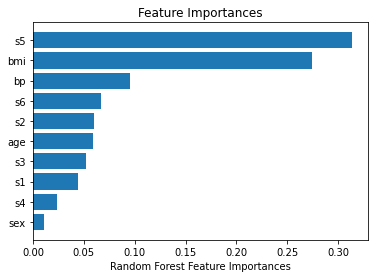

In [8]:
# Let'see how we can get feature importance from a model
# like Random Forest

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
# fetch a regression dataest
# in diabetes data we predict diavetes progression
# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
print(col_names)
# initialize the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# Feature importances from random forest(or any model) and be plotted as follows.
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importances')
plt.show()

- Well, selecting the best features from the model is nothing new. You can choose features from one model and use another model to train.

In [9]:
# we select the features using default parameters in SelectFromModel.

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# fetch a regression dataset
# in diabetes data we predict diabetes progression # after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()

# select from the model
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit(X, y)

# see what features were selected
support = sfm.get_support()

# get features names
print([
    x for x, y in zip(col_names, support) if y == True
])

['bmi', 's5']


- we see that these are the top- 2 features.

One more thing that we are missing here is feature selection using models that have L1 (Lasso) penalization. When we have L1 penalization for regularization, most coefficients will be 0 (or close to 0), and we select the features with non-zero coefficients. You can do it by just replacing random forest in the snippet of selection from a model with a model that supports L1 penalty, e.g. lasso regression. All tree-based models provide feature importance so all the model-based snippets shown in this chapter can be used for XGBoost, LightGBM or CatBoost. The feature importance function names might be different and may produce results in a different format, but the usage will remain the same. In the end, you must be careful when doing feature selection. Select features on training data and validate the model on validation data for proper selection of features without overfitting the model.